In [82]:
def wSz(M):
    indeks = []
    for u,v in M.edges(labels = false):
        blizu_u = 0
        for a in M.vertices():
            if M.distance(a,u)< M.distance(a,v):
                blizu_u += 1
            blizu_v = order(M)- blizu_u
        indeks += [(M.degree(u) + M.degree(v)) * blizu_u * blizu_v]
    return sum(indeks)

In [83]:
from sage.graphs.connectivity import is_connected
def spremeni_graf(G):
    H = Graph(G)
    if random() < 0.5:
        i = 0
        while True:
            H.delete_edge(H.random_edge())
            if is_connected(H):
                H
                break
            else:
                H = Graph(G)
                i = i + 1
                True
            if i > 15: #Št. poskusov odstranitve
                H.add_edge(H.complement().random_edge()) #Grafu H doda random povezavo, ki je še ni v grafu (izbira povezave iz komplementa grafa H)
                break
    else:
        if H.complement().size() == 0: #Če je število povezav v komplementu == 0
            H.delete_edge(H.random_edge()) # Grafu H zbriše random povezavo
        else:
            H.add_edge(H.complement().random_edge()) # Graf H doda povezavo, ki je še ni v grafu (izbira med povezavami v komplementu)
    # Naprej se hočemo znebiti ciklov!
    M = Graph(H)
    while True:
        M.delete_edge(M.random_edge())
        if is_connected(M):
            M
            break
        else:
            M = Graph(H)
    return M

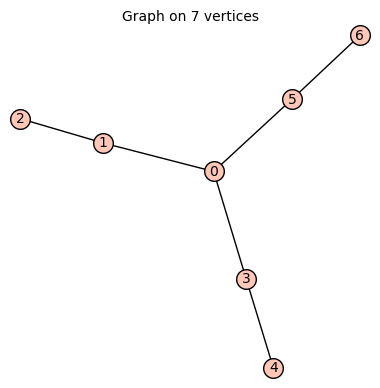

In [85]:
H = Graph([(0, 1), (1, 2),(0,3),(3,4),(0,5),(5,6)])
spremeni_graf(H)

In [86]:
def min_wSz_novo_vozlisce(G):
    # min wSz iščemo tako da dodamo vozlišče s povezavo na graf z min wSz!
    H = Graph(G)
    novo_vzl = order(H)
    H.add_edge((0,novo_vzl,None))
    k = 0
    primerjajH = H
    while k < novo_vzl*(novo_vzl+1)/2:
        k = k + 1
        H = spremeni_graf(H)
        if wSz(H) < wSz(primerjajH):
            primerjajH = H
        else:
            globina = 1
            while globina < novo_vzl*(novo_vzl+1)/k :
                globina = globina + 1
                H = spremeni_graf(H)
                if wSz(H) < wSz(primerjajH):
                    primerjajH = H
                    break
    return primerjajH

In [87]:
H7 = Graph([(0, 1), (1, 2),(0,3),(3,4),(0,5),(5,6)])
H8 = min_wSz_novo_vozlisce(H7)
H9 = min_wSz_novo_vozlisce(H8)
H9

In [73]:
def najdi_graf_z_min_wSz(G):
    i = 1
    najboljsiH = min_wSz_novo_vozlisce(G)
    while i < order(G)/4:
        i = i + 1
        H = min_wSz_novo_vozlisce(G)
        if wSz(H) < wSz(najboljsiH):
            najboljsiH = H
    return H

In [81]:
G = Graph([(0, 1), (1, 2),(2,3),(1,4),(4,5),(0,6),(6,7),(7,8),(6,9),(9,10),(0,11),(11,12),(11,13),(13,14),(0,15),(15,16),(16,17),(15,18),(18,19)])
najdi_graf_z_min_wSz(G).plot()

KeyboardInterrupt: 